In [36]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [37]:
def setup_class(parameter):
    """
    It sets up the CLASS code with the given cosmological parameter.
    """
    c = Class()
    c.set(parameter)
    return c

In [85]:
def get_lensed_cl(c, l):
    """
    It runs the CLASS code and aceessess the lensed cl until lmax=2500.
    """
    c.compute()
    cls = c.lensed_cl(l)
    return cls

In [94]:
def plot_tt_cmb_spectrum(c, l=2500, xscale='log', yscale='linear', T_cmb=2.72548):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is TT power spectrum, i.e. temperature anisotropies.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll[0], ll[-1])
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TT}$  [$\mu$K$^2$]')
    plt.title("CMB angular power spectrum (TT)")

    # clTT*ll*(ll+1)/2./np.pi is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    # x-axis = multipole moment, y-axis = power per ln(l), in units of K^2
    T_cmb_uK = T_cmb*1e6
    plt.plot(ll, clTT*ll*(ll+1)/2./np.pi*T_cmb_uK**2, 'r-')

In [96]:
def plot_te_cmb_spectrum(c, l=2000, xscale='log', yscale='linear', T_cmb=2.72548):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is TE power spectrum, i.e. temperature-polarization cross-correlation.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clTE = cls['te'][2:]
    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll[0], ll[-1])
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TE}$  [$\mu$K$^2$]')
    plt.title("CMB angular power spectrum (TE)")

    # clTE*ll*(ll+1)/2./np.pi is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    # x-axis = multipole moment, y-axis = power per ln(l), in units of K^2
    T_cmb_uK = T_cmb*1e6
    plt.plot(ll, clTE*ll*(ll+1)/2./np.pi*T_cmb_uK**2, 'r-')

In [110]:
def plot_ee_cmb_spectrum(c, l=2000, xscale='log', yscale='linear', T_cmb=2.72548):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is EE power spectrum, i.e. polarization-polarization.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clEE = cls['ee'][2:]
    
    # Separate ll and clEE into two parts
    ll_low = ll[ll<30]
    clEE_low = clEE[ll<30]
    
    ll_high = ll[ll>=30]
    clEE_high = clEE[ll>=30]

    T_cmb_uK = T_cmb*1e6

    # Plot for l<30
    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll_low[0], ll_low[-1])
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$C_\ell^\mathrm{EE}$  [$10^{-5}\mu$K$^2$]')
    plt.title("CMB angular power spectrum (EE) for $\ell$<30")
    plt.plot(ll_low, clEE_low*T_cmb_uK**2/10**-5, 'r-')

    # Plot for l>30
    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll_high[0], ll_high[-1])
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$C_\ell^\mathrm{EE}$  [$ 10^{-5}\mu$K$^2$]')
    plt.title("CMB angular power spectrum (EE) for $\ell$>=30")
    plt.plot(ll_high, clEE_high*T_cmb_uK**2/10**-5, 'r-')

In [116]:
def plot_lensing_cmb_spectrum(c, l=2500, xscale='log', yscale='linear'):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is lensing power spectrum.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clPP = cls['pp'][2:]

    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll[0], ll[-1])
    plt.xlabel(r'$L$')
    plt.ylabel(r'$[[\ell(\ell+1)]^2/2\pi] C_\ell^\mathrm{PP}$  [$10^{-7}$]')
    plt.plot(ll, clPP*(ll*(ll+1))**2/2./np.pi, 'r-')
    plt.title("CMB angular power spectrum (lensing)")


In [56]:
def plot_matter_spectrum(c):
    """
    It plots the Matter power spectrum.
    """
    kk = np.logspace(-4, np.log10(3), 1000)
    Pk = []
    for k in kk:
        Pk.append(c.pk(k, 0.))
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(kk[0], kk[-1])
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.title("Matter power spectrum")
    plt.plot(kk, Pk, 'b-')

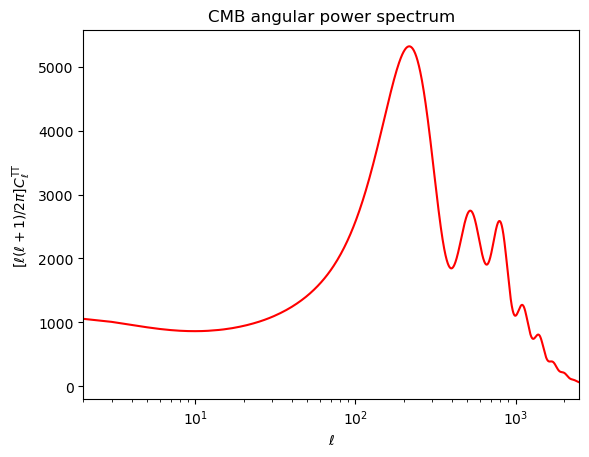

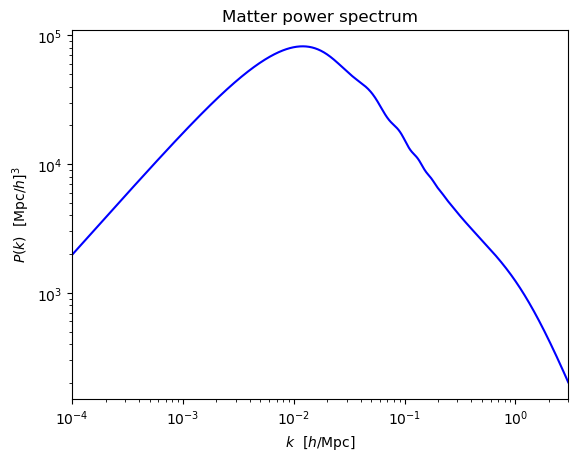

In [78]:
# Reproduce the result from tutorials (test)
example_params={
"T_cmb":2.7255,
"h":0.67,
"Omega_b":0.04,
"Omega_cdm":0.3,
"reio_parametrization": "reio_camb",
"z_reio":9,
"P_k_ini type": "analytic_Pk",
"A_s": 2.2e-9,
"n_s": 0.96,
"lensing": "yes",
"non linear": "halofit",
"output": "tCl,pCl,lCl,mPk",
"modes":"s",
"P_k_max_1/Mpc":3.0
}
example = setup_class(example_params)
plot_tt_cmb_spectrum(example)
plot_matter_spectrum(example)

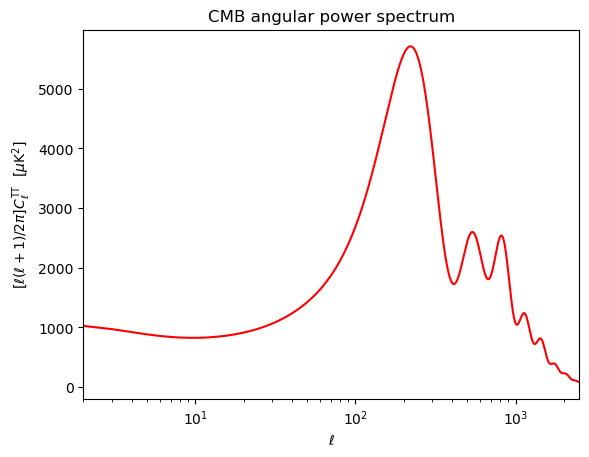

In [89]:
# Cold dark matter model from paper: Planck Sattellite Planck 2018; arXiv:1807.06211
# Want to reproduce the four plots in Fig. 1

# Data from TT+lowE
params_cold_TT = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1206,
    "omega_b": 0.02212, 
    "H0": 66.88, 
    "A_s": np.exp(3.040)/10**10, #ln10^{10}A_s=3.040
    "n_s": 0.9626,
    "tau_reio": 0.0522,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}
cold_TT = setup_class(params_cold_TT)
plot_tt_cmb_spectrum(cold_TT)

# Question: Use data from TT+lowE or TT,TE,EE+lowE+lensing?
# Do comparisons later

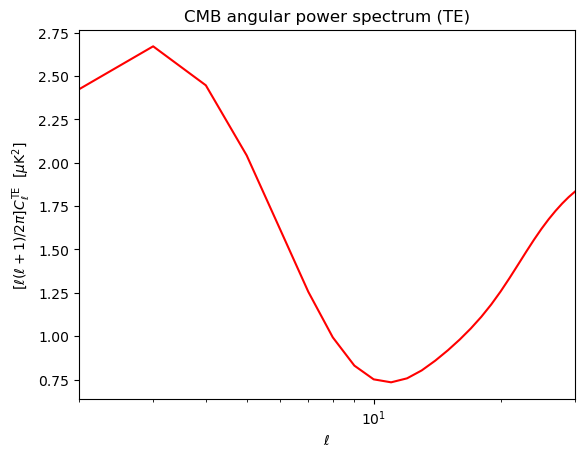

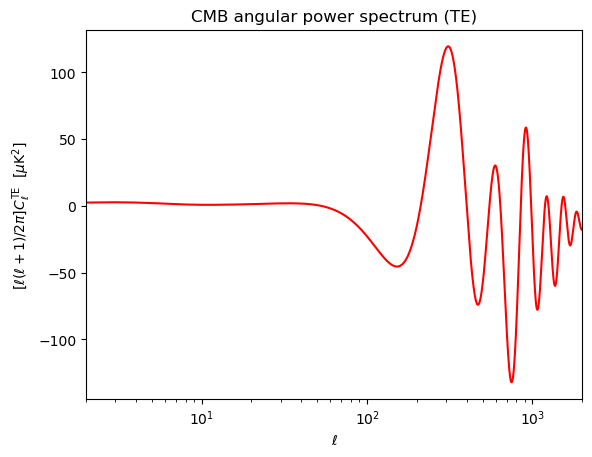

In [100]:
# Data from TE+lowE

# Divide into two parts: l<30, and 200>l>30
params_cold_TE = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1177,
    "omega_b": 0.02249, 
    "H0": 68.44, 
    "A_s": np.exp(3.018)/10**10, #ln10^{10}A_s=3.018
    "n_s": 0.967,
    "tau_reio": 0.0496,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

cold_TE = setup_class(params_cold_TE)
# l<30
plot_te_cmb_spectrum(cold_TE, l=30)
# 200>l>30
plot_te_cmb_spectrum(cold_TE)


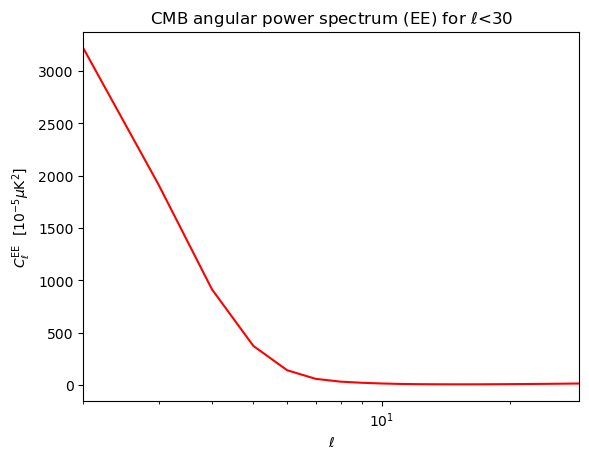

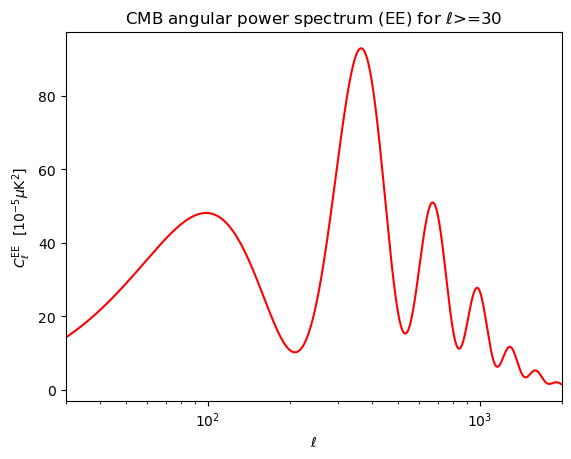

In [111]:
# Data from EE+lowE

# Divide into two parts: l<30, and 200>l>30
params_cold_EE = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1158,
    "omega_b": 0.0240, 
    "H0": 69.9, 
    "A_s": np.exp(3.052)/10**10, #ln10^{10}A_s=3.052
    "n_s": 0.980,
    "tau_reio": 0.0527,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

cold_EE = setup_class(params_cold_EE)
plot_ee_cmb_spectrum(cold_EE)

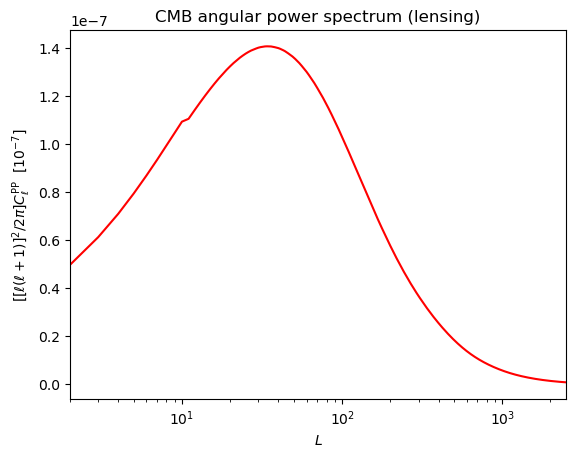

In [117]:
# Data from TT+TE+EE+lowE+lensing
params_cold_lensing = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1200,
    "omega_b": 0.02237, 
    "H0": 67.36, 
    "A_s": np.exp(3.044)/10**10, #ln10^{10}A_s=3.044
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}
cold_lensing = setup_class(params_cold_lensing)
plot_lensing_cmb_spectrum(cold_lensing)

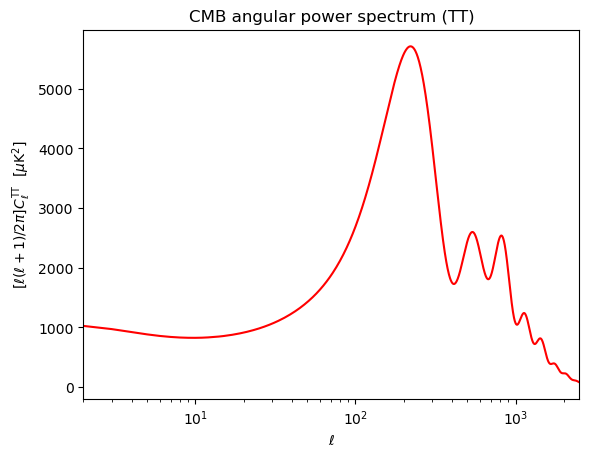

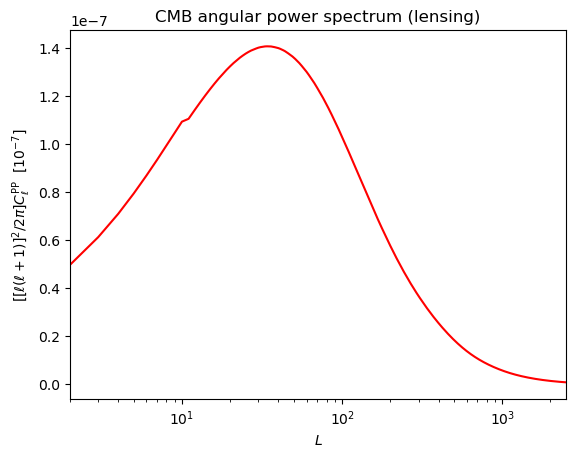

In [119]:
# Comparison: Use TT+lowE or TT,TE,EE+lowE+lensing? Similarily for the other two plots

# TT
plot_tt_cmb_spectrum(cold_TT)
plot_lensing_cmb_spectrum(cold_lensing)
plt.show()

# Friday's task: Write new codes or modify the current codes to make comparisons
# Use new codes to play around how parameters might change the power spectrum
# Looking at the matter power spectrum
